In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

Heart diseases prediction

Heart disease is one of the leading common cause of death in the world. For that, we will use this dataset using the features given to predict if someone is most likely to suffer from a heart disease in the near future.

We have the following features:
- age: age of the person
- sex: gender of the person (1 = male; 0 = female) 
- chest_pain_type: type of the chest pain
    - Value 1: typical angina
    - Value 2: atypical angina
    - Value 3: non-anginal pain
    - Value 4: asymptomatic 
- resting_bp - blood pressure while resting (in mm Hg on admission to the hospital) 
- cholesterol - person's cholestrol in mg/dl 
- fasting_blood_sugar - Blood sugar while fasting > 120 mg/dl (1 = true; 0 = false)
- restecg - resting electrocardiographic results
    - Value 0: normal
    - Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    - Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria 
- max_hr - Maximum heart rate
- exang - exercise induced angina (1 = yes; 0 = no)
- oldpeak - ST depression induced by exercise relative to rest 
- slope - the slope of the peak exercise ST segment
    - Value 1: upsloping
    - Value 2: flat
    - Value 3: downsloping 
- num_major_vessels - number of major vessels (0-3) colored by flourosopy
- thal: 0 to 3
- target - 
    - value 0: No heart disease
    - value 1: Heart disease dysfunction propability


In [29]:


dataframe = pd.read_csv("../dataset/heart.csv")
dataframe

,age,sex,chest_pain_type,resting_bp,cholestoral,fasting_blood_sugar,restecg,max_hr,exang,oldpeak,slope,num_major_vessels,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


# Data visualisation

In [30]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  303 non-null    int64  
 1   sex                  303 non-null    int64  
 2   chest_pain_type      303 non-null    int64  
 3   resting_bp           303 non-null    int64  
 4   cholestoral          303 non-null    int64  
 5   fasting_blood_sugar  303 non-null    int64  
 6   restecg              303 non-null    int64  
 7   max_hr               303 non-null    int64  
 8   exang                303 non-null    int64  
 9   oldpeak              303 non-null    float64
 10  slope                303 non-null    int64  
 11  num_major_vessels    303 non-null    int64  
 12  thal                 303 non-null    int64  
 13  target               303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [31]:
dataframe.describe()

,age,sex,chest_pain_type,resting_bp,cholestoral,fasting_blood_sugar,restecg,max_hr,exang,oldpeak,slope,num_major_vessels,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [32]:
dataframe.columns

Index(['age', 'sex', 'chest_pain_type', 'resting_bp', 'cholestoral',
       'fasting_blood_sugar', 'restecg', 'max_hr', 'exang', 'oldpeak', 'slope',
       'num_major_vessels', 'thal', 'target'],
      dtype='object')

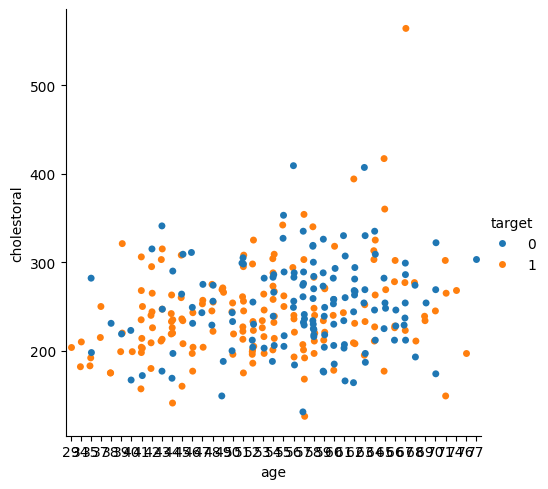

In [33]:
sns.catplot(x='age', y='cholestoral', data=dataframe, hue='target')

<Axes: >

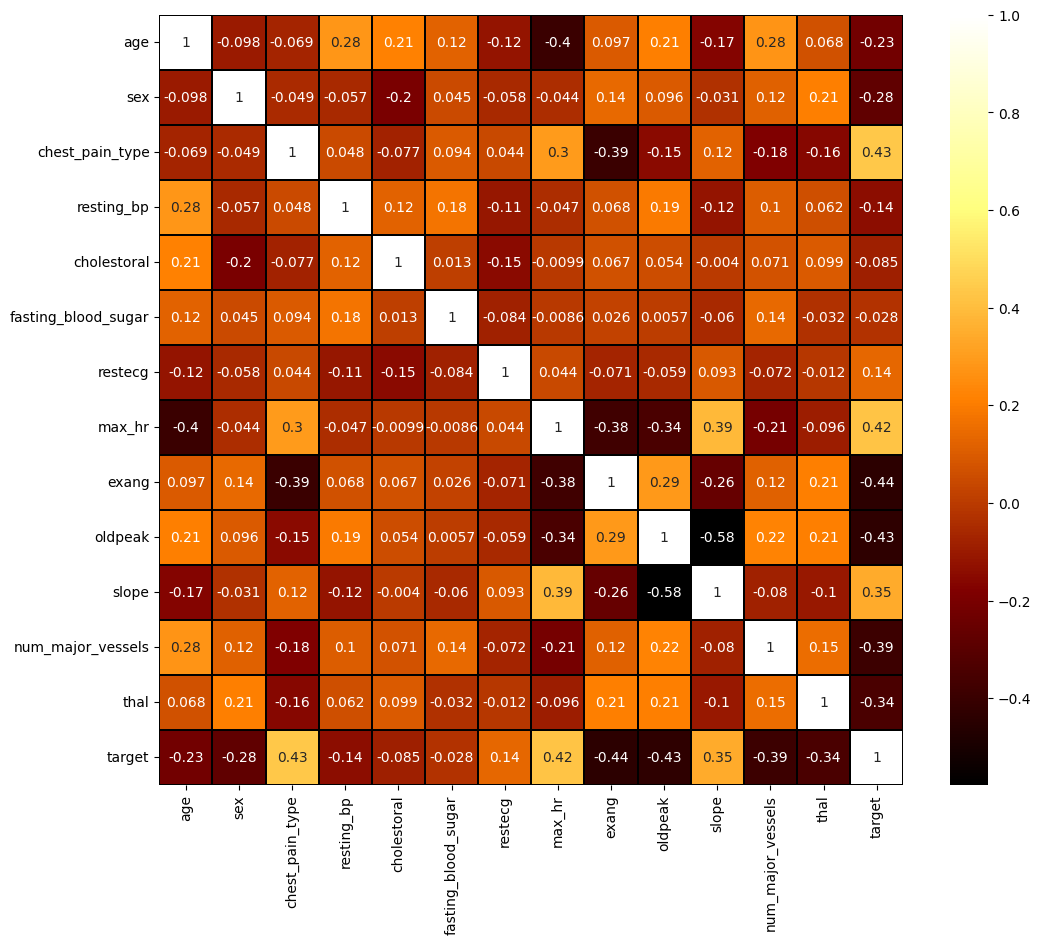

In [34]:
plt.figure(figsize=(12,10))
corr = dataframe.corr()
sns.heatmap(corr, annot = True, linewidths= 0.2, linecolor= 'black', cmap = 'afmhot')

# Removing target values from the dataframe

In [35]:
features = np.array(dataframe.drop("target", axis=1))

target = np.array(dataframe["target"])

del dataframe['target']

print("X shape: ",features.shape)
print("Y shape: ",target.shape)

X shape:  (303, 13)
Y shape:  (303,)


#Print the shape and data type of the dataframe

In [36]:
print (f"Shape: {dataframe.shape}")
print (dataframe.dtypes)

Shape: (303, 13)
age                      int64
sex                      int64
chest_pain_type          int64
resting_bp               int64
cholestoral              int64
fasting_blood_sugar      int64
restecg                  int64
max_hr                   int64
exang                    int64
oldpeak                float64
slope                    int64
num_major_vessels        int64
thal                     int64
dtype: object


# Splitting the dataset into train set and test set

In [37]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=5)
print("X train shape: ",X_train.shape)
print("Y train shape: ",y_train.shape)

X train shape:  (242, 13)
Y train shape:  (242,)


#Modelisation
# We will use use some classification models and choose the one who has the best score.

In [38]:
#KNeighborsClassifier
def KNN():
  model_KNN = KNeighborsClassifier(n_neighbors=3, weights='distance', algorithm = 'auto', leaf_size = 10, p = 3, metric = 'manhattan' )
  model_KNN.fit(X_train,y_train)
  return model_KNN


print(f"Train set score: {KNN().score(X_train,y_train) * 100} %")
print(f"Test set score:  {KNN().score(X_test,y_test) * 100} %")

Train set score: 100.0 %
Test set score:  70.49180327868852 %


In [39]:
#RandomForestClassifier
def RFC():
  model_RFC=RandomForestClassifier(n_estimators = 300)
  model_RFC.fit(X_train,y_train)
  return model_RFC


print(f"Train set score: {RFC().score(X_train,y_train)* 100} %")
print(f"Test set score:  {RFC().score(X_test,y_test)* 100} %")

Train set score: 100.0 %
Test set score:  90.1639344262295 %


In [40]:
#LogisticRegression
def LR():
  model_LR = LogisticRegression(random_state=5)
  model_LR.fit(X_train, y_train)
  return model_LR


print(f"Train set score: {LR().score(X_train,y_train)* 100} %")
print(f"Test set score:  {LR().score(X_test,y_test)* 100} %")

Train set score: 83.47107438016529 %
Test set score:  91.80327868852459 %


c:\Users\pc817\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\pc817\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

#Cross validation

In [41]:
from sklearn.model_selection import cross_val_score
     
model = KNeighborsClassifier()
cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy').mean()

0.6284863945578232

[0.5951530612244899, 0.5744047619047619, 0.5993197278911565, 0.6237244897959183, 0.6284863945578232, 0.611734693877551, 0.611904761904762, 0.5993197278911564, 0.6077380952380953, 0.6244047619047619, 0.6119897959183673, 0.6202380952380951, 0.6326530612244898, 0.6327380952380952, 0.6369897959183674, 0.6494047619047618, 0.661734693877551, 0.6660714285714285, 0.6616496598639455, 0.6533163265306122, 0.6657312925170069, 0.6493197278911566, 0.6701530612244898, 0.6493197278911564, 0.6659863945578233, 0.6741496598639455, 0.6782312925170068, 0.6782312925170069, 0.6781462585034014, 0.674234693877551, 0.6657312925170068, 0.6573979591836735, 0.66156462585034, 0.6659013605442177, 0.6576530612244897, 0.6575680272108844, 0.6575680272108844, 0.6453231292517007, 0.6576530612244897, 0.6660714285714284, 0.6577380952380951, 0.6619047619047619, 0.6658163265306122, 0.661734693877551, 0.6575680272108844, 0.661734693877551, 0.6410714285714285, 0.6453231292517007, 0.6453231292517007]


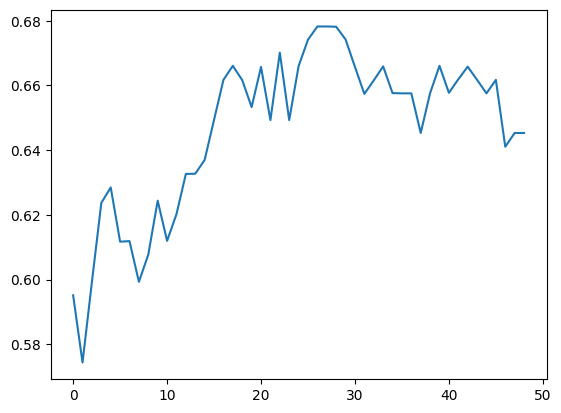

In [42]:
val_score = []
for k in range(1, 50):
    score = cross_val_score(KNeighborsClassifier(k), X_train, y_train, cv=5).mean()
    val_score.append(score)

print(val_score)
plt.plot(val_score)
     


In [43]:

param_grid = {'n_neighbors': np.arange(1, 20),
              'metric': ['euclidean', 'manhattan']}

grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)

grid.fit(X_train, y_train)

print(grid.best_score_)
print(grid.best_estimator_)

0.6821428571428572
KNeighborsClassifier(metric='manhattan', n_neighbors=19)


In [44]:
colm = ['Age','Sex', 'Chest pain type','BP','Cholesterol','FBS over 120','EKG results','Max HR','Exercise angina','Slope of ST', 'Number of vessels fluro', 'Thallium', 'Heart Disease']
feat = np.array([23, 1, 1, 100, 500, 1, 1, 200, 1, 4.5, 2, 1, 2])
# feat = np.array(feat)
feat = np.reshape(feat,(1, feat.shape[0]))
feat.shape


(1, 13)

#Lets make some prediction on the test set

In [45]:
predict_KNN = KNN().predict(X_test)
print(predict_KNN)
print(KNN().score(X_test, predict_KNN))

[1 0 0 0 1 0 1 0 1 1 0 0 1 1 0 1 1 1 0 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1
 1 0 1 1 0 1 0 1 1 1 1 0 0 0 1 1 0 1 1 0 1 1 1 1]
1.0


In [46]:
predict_RFC = RFC().predict(X_test)
print(predict_RFC)
print(RFC().score(X_test, predict_RFC))

[1 0 0 0 1 0 1 0 1 1 1 0 1 1 1 0 0 1 1 0 0 0 1 0 0 1 1 1 1 0 1 1 1 1 0 0 1
 1 0 1 1 0 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 0]
0.9836065573770492


In [47]:
predict_LR = LR().predict(X_test)
print(predict_LR)
print(LR().score(X_test, predict_LR))

[1 0 0 0 1 0 1 0 1 1 1 0 1 1 0 0 0 1 1 0 0 0 1 0 0 1 1 1 1 0 1 1 1 1 0 0 1
 1 0 1 1 0 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 1 0]
1.0


c:\Users\pc817\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\pc817\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

#Let's use a confusion matrix to see wich one of our models have the less lost

<Axes: >

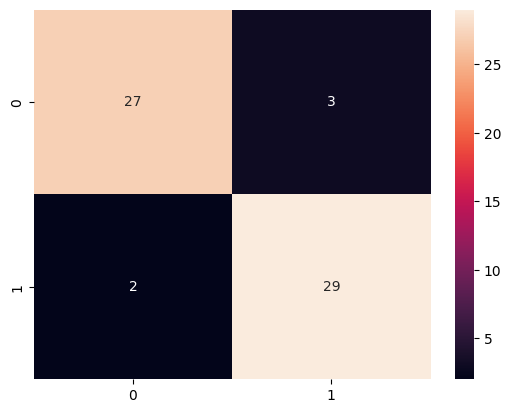

In [48]:
from sklearn.metrics import confusion_matrix
#LogisticRegression
sns.heatmap(confusion_matrix(y_test, predict_LR), annot=True)

<Axes: >

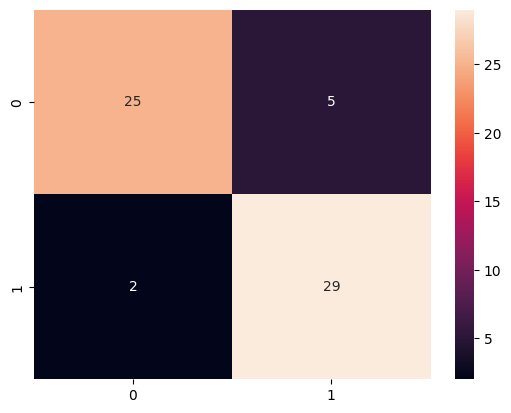

In [49]:
#RandomForestClassifier
sns.heatmap(confusion_matrix(y_test, predict_RFC), annot=True)

<Axes: >

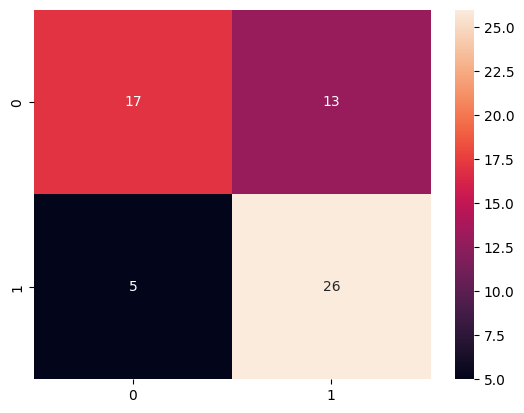

In [50]:
#KNeighborsClassifier
sns.heatmap(confusion_matrix(y_test, predict_KNN), annot=True)

#The model with the less lost happen to be the Logistic Regression model
#Let's save it

In [51]:
import pickle
filename = 'heartDisease_model.sav'
pickle.dump(model, open(filename, 'wb'))